In [ ]:
!wget http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz

--2024-08-16 19:39:36--  http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz
Resolving ai.stanford.edu (ai.stanford.edu)... 171.64.68.10
Connecting to ai.stanford.edu (ai.stanford.edu)|171.64.68.10|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 84125825 (80M) [application/x-gzip]
Saving to: ‘aclImdb_v1.tar.gz.1’

aclImdb_v1.tar.gz.1 100%[===================>]  80.23M  38.2MB/s    in 2.1s    

2024-08-16 19:39:38 (38.2 MB/s) - ‘aclImdb_v1.tar.gz.1’ saved [84125825/84125825]



In [ ]:
!tar xvzf aclImdb_v1.tar.gz

Streaming output truncated to the last 5000 lines.
aclImdb/train/unsup/44983_0.txt
aclImdb/train/unsup/44982_0.txt
aclImdb/train/unsup/44981_0.txt
aclImdb/train/unsup/44980_0.txt
aclImdb/train/unsup/44979_0.txt
aclImdb/train/unsup/44978_0.txt
aclImdb/train/unsup/44977_0.txt
aclImdb/train/unsup/44976_0.txt
aclImdb/train/unsup/44975_0.txt
aclImdb/train/unsup/44974_0.txt
aclImdb/train/unsup/44973_0.txt
aclImdb/train/unsup/44972_0.txt
aclImdb/train/unsup/44971_0.txt
aclImdb/train/unsup/44970_0.txt
aclImdb/train/unsup/44969_0.txt
aclImdb/train/unsup/44968_0.txt
aclImdb/train/unsup/44967_0.txt
aclImdb/train/unsup/44966_0.txt
aclImdb/train/unsup/44965_0.txt
aclImdb/train/unsup/44964_0.txt
aclImdb/train/unsup/44963_0.txt
aclImdb/train/unsup/44962_0.txt
aclImdb/train/unsup/44961_0.txt
aclImdb/train/unsup/44960_0.txt
aclImdb/train/unsup/44959_0.txt
aclImdb/train/unsup/44958_0.txt
aclImdb/train/unsup/44957_0.txt
aclImdb/train/unsup/44956_0.txt
aclImdb/train/unsup/44955_0.txt
aclImdb/train/unsup/4

In [ ]:
import os

def fetch_reviews(path):
  data = []
  #path = 'aclImdb/train/pos/'
  files = [f for f in os.listdir(path)]
  for file in files:
    with open(path+file, "r", encoding='utf8') as f:
      data.append(f.read())

  return data

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


df_train_pos = pd.DataFrame({'review': fetch_reviews('aclImdb/train/pos/'), 'label': 1})
df_train_neg = pd.DataFrame({'review': fetch_reviews('aclImdb/train/neg/'), 'label': 0})

df_test_pos = pd.DataFrame({'review': fetch_reviews('aclImdb/test/pos/'), 'label': 1})
df_test_neg = pd.DataFrame({'review': fetch_reviews('aclImdb/test/neg/'), 'label': 0})

# Merging all df's for data cleaning and preprocessing step.
df = pd.concat([df_train_pos, df_train_neg, df_test_pos, df_test_neg], ignore_index=True)
print("Total reviews in df: ", df.shape)
df.head()

Total reviews in df:  (50000, 2)


,review,label
0,Critics need to review what they class as a qu...,1
1,I remember seeing this years ago when it first...,1
2,"Lapyuta (Castle in the Sky), more than any of ...",1
3,"Dear Readers,<br /><br />The final battle betw...",1
4,"Let me be up-front, I like pulp. However it is...",1


In [ ]:
print(df['review'].isnull().sum())
print("Total Number of positive reviews in data: ", df[df['label']==1].shape[0])
print("Total Number of negative reviews in data: ", df[df['label']==0].shape[0])

0
Total Number of positive reviews in data:  25000
Total Number of negative reviews in data:  25000


In [ ]:
df[df['label']==1].sample(n=1)['review'].iloc[0]

'Christine Lahti (Sandy Dunlap) and Mary Tyler Moore (Holly Davis) worked well with soapish material, Ted Danson did his best with a thankless role of Chip Davis The premise of this that the two ladies\' friendship, one a seemingly happily married woman and the other a career woman who is aware of her biological clock ticking. I found the relationship that Ted Danson\'s character had with the single woman played by Christine Lahti\'s rather sordid. He behaved in a caddish way, yet he left two "widows" pining over him, bawling. I found it revolting when when Sandy told him she wanted to break it off after meeting his wife, he calls her saying he misses her (did he call his wife? There was no sign of that). He behaved like a heel. It perhaps would have made a more interesting film had he not been killed off. Perhaps both ladies would have wised up and dumped him. I liked the friendship between the two ladies but it was spoiled by what they had in common: The Cad of a husband.'

In [ ]:
df[df['label']==0].sample(n=1)['review'].iloc[0]

"Predictable, cliche, unbelievable, boring...what else can I say? It's only the caliber of the cast that saves any redeeming qualities of this bloated mess. Oh yeah, and the entertaining end zone antics.<br /><br />But wait for the eleven o'clock highlights, 'cause the outcome is as predictable as who's going to win the Globetrotters/Washington Generals matchup.<br /><br />I was well into the second act before I figured out these were supposed to be PRO teams we were watching (all clad in vintage Padres brown). And Cameron Diaz character's imitation of a youthful Georgia Frontiere was ill-conceived on the page. (Not your fault, Cameron. Would you like to go to dinner?)<br /><br />Enough of this - I'm only on a rant because I was looking forward to this film. Rent THE LONGEST YARD instead.<br /><br />"

In [ ]:
word_counts = df['review'].apply(lambda x: len(x.split()))

word_counts.describe()

,review
count,50000.000000
mean,231.156940
std,171.343997
min,4.000000
25%,126.000000
50%,173.000000
75%,280.000000
max,2470.000000


In [ ]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

stop_words = stopwords.words('english')
stop_words.remove('not')
lemmatizer = WordNetLemmatizer()

def data_preprocessing(review):

  # data cleaning
  review = re.sub(re.compile('<.*?>'), '', review)
  review =  re.sub('[^A-Za-z0-9]+', ' ', review)

  # lowercase
  review = review.lower()

  # tokenization
  tokens = nltk.word_tokenize(review)

  # stop_words removal
  review = [word for word in tokens if word not in stop_words]

  # lemmatization
  review = [lemmatizer.lemmatize(word) for word in review]

  # join words in preprocessed review
  review = ' '.join(review)

  return review

In [ ]:
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'only', 'own', 'same', 'so', 'than', 'too', '

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')

df['preprocessed_review'] = df['review'].apply(lambda review: data_preprocessing(review))
df.head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...


,review,label,preprocessed_review
0,Critics need to review what they class as a qu...,1,critic need review class quality movie think c...
1,I remember seeing this years ago when it first...,1,remember seeing year ago first came floored pa...
2,"Lapyuta (Castle in the Sky), more than any of ...",1,lapyuta castle sky hayao miyazaki movie brings...
3,"Dear Readers,<br /><br />The final battle betw...",1,dear reader final battle rebellion empire seco...
4,"Let me be up-front, I like pulp. However it is...",1,let front like pulp however like one easier di...


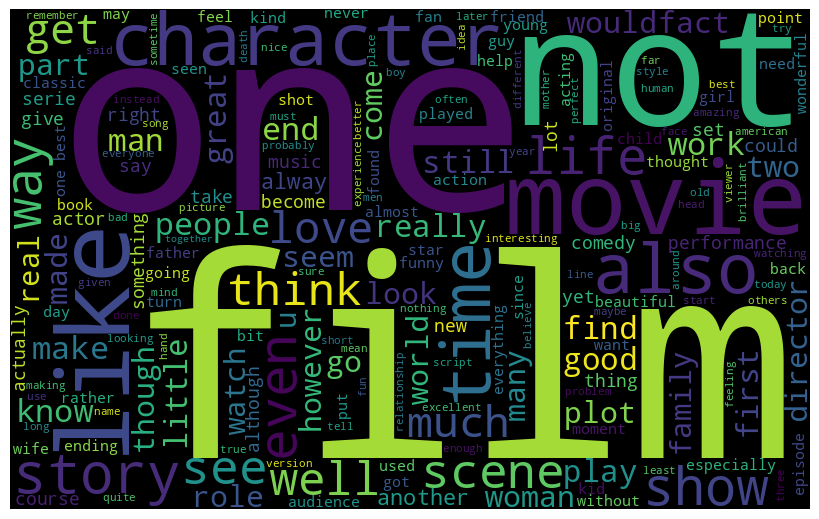

In [ ]:
from wordcloud import WordCloud

words_list = df[df['label']==1]['preprocessed_review'].unique().tolist()
pos_words = " ".join(words_list)

pos_wordcloud =  WordCloud(
                  width=800, height = 500,
                  stopwords=stop_words).generate(pos_words)

plt.figure(figsize=(8, 8), facecolor = None)
plt.imshow(pos_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

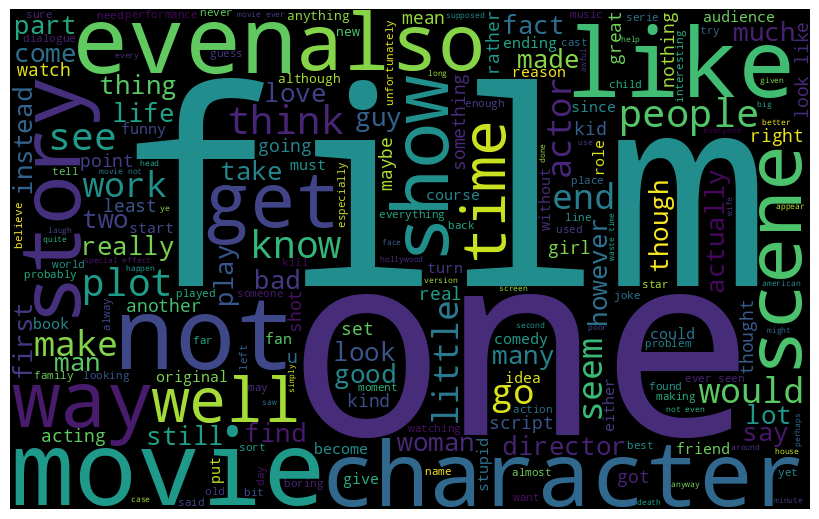

In [ ]:
words_list = df[df['label']==0]['preprocessed_review'].unique().tolist()
neg_words = " ".join(words_list)

neg_wordcloud =  WordCloud(
                  width=800, height = 500,
                  stopwords=stop_words).generate(neg_words)

plt.figure(figsize=(8, 8), facecolor = None)
plt.imshow(neg_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split

data = df.copy()
y = data['label'].values
data.drop(['label'], axis=1, inplace=True)

X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.3, stratify=y)

print("Train data:",  X_train.shape, y_train.shape)
print("Test data:",  X_test.shape, y_test.shape)

Train data: (35000, 2) (35000,)
Test data: (15000, 2) (15000,)


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer(min_df=10)

X_train_review_bow = vect.fit_transform(X_train['preprocessed_review'])
X_test_review_bow = vect.transform(X_test['preprocessed_review'])

print('X_train_review_bow shape: ', X_train_review_bow.shape)
print('X_test_review_bow shape: ', X_test_review_bow.shape)

X_train_review_bow shape:  (35000, 19508)
X_test_review_bow shape:  (15000, 19508)


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(min_df=10)

X_train_review_tfidf = vectorizer.fit_transform(X_train['preprocessed_review'])
X_test_review_tfidf = vectorizer.transform(X_test['preprocessed_review'])

print('X_train_review_tfidf shape: ', X_train_review_tfidf.shape)
print('X_test_review_tfidf shape: ', X_test_review_tfidf.shape)

X_train_review_tfidf shape:  (35000, 19508)
X_test_review_tfidf shape:  (15000, 19508)


In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

clf = MultinomialNB()
clf.fit(X_train_review_bow, y_train)

y_pred = clf.predict(X_test_review_bow) #prediction from model
print('Test Accuracy: ', accuracy_score(y_test, y_pred))

Test Accuracy:  0.8544


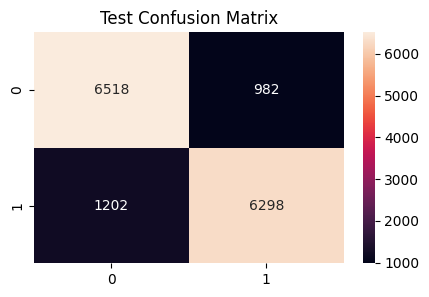

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 3))
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Test Confusion Matrix')
plt.show()

In [ ]:
clf = MultinomialNB(alpha=1)
clf.fit(X_train_review_tfidf, y_train)

y_pred = clf.predict(X_test_review_tfidf)
print('Test Accuracy: ', accuracy_score(y_test, y_pred))

Test Accuracy:  0.8607333333333334


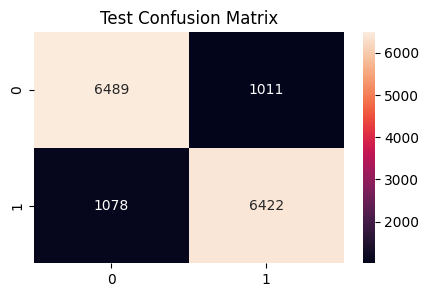

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 3))
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Test Confusion Matrix')
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(penalty='l2')
clf.fit(X_train_review_bow, y_train)

y_pred = clf.predict(X_test_review_bow) #prediction from model
print('Test Accuracy: ', accuracy_score(y_test, y_pred))

Test Accuracy:  0.8790666666666667


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


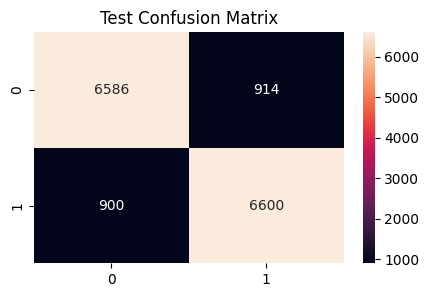

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 3))
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Test Confusion Matrix')
plt.show()

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(penalty='l2')
clf.fit(X_train_review_tfidf, y_train)

y_pred = clf.predict(X_test_review_tfidf)
print('Test Accuracy: ', accuracy_score(y_test, y_pred))

Test Accuracy:  0.8916


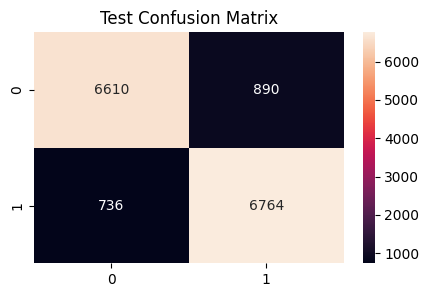

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 3))
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Test Confusion Matrix')
plt.show()

In [ ]:
from prettytable import PrettyTable

x = PrettyTable()

x.field_names = ['Vectorizer', 'Model', 'Accuracy']
x.add_row(['BOW', 'Naive Bayes', '84.6%'])
x.add_row(['TFIDF', 'Naive Bayes', '85.3%'])
x.add_row(['BOW', 'Logistic Regression', '88%'])
x.add_row(['TFIDF', 'Logistic Regression', '88.0%'])
print(x)

+------------+---------------------+----------+
| Vectorizer |        Model        | Accuracy |
+------------+---------------------+----------+
|    BOW     |     Naive Bayes     |  84.6%   |
|   TFIDF    |     Naive Bayes     |  85.3%   |
|    BOW     | Logistic Regression |   88%    |
|   TFIDF    | Logistic Regression |  88.0%   |
+------------+---------------------+----------+
